# Lab-3: Exploratory Data Analysis - Examining Relationships

### By Mohan Bakshi

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from tabulate import tabulate

# 1. Import dataset, examine dataset (shape, sample rows, columns), classify columns to categorical and quantitative variables.

In [2]:
# importing the dataset from a csv file using pandas
dataset_frame = pd.read_csv('insurance.csv')

In [3]:
print(dataset_frame.shape)
dataset_frame.head(10)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


The shape of the insurance df is (1138, 7), which means it has 1138 rows (instances) and 7 columns (features or variables).

In [4]:
# Classifying column into categorical and quantitaive columns

def check_columns(df: pd.DataFrame):
    columns = df.columns
    quantitative_columns = list(set(df._get_numeric_data().columns))
    categorical_columns = list(set(columns) - set(quantitative_columns))
    return quantitative_columns, categorical_columns

quan_cols, cat_cols = check_columns(dataset_frame)
print(f'Quantitative columns are: {quan_cols}')
print(f'Categorical columns are: {cat_cols}')

Quantitative columns are: ['bmi', 'charges', 'children', 'age']
Categorical columns are: ['region', 'smoker', 'sex']


**Quantitative Variables:**

**1. bmi (Body Mass Index):** This is a numerical variable that represents a person's weight in relation to their height. BMI is measured on a continuous scale and can take on a wide range of values.

**2. charges (Medical Charges):** This variable represents the medical charges incurred by individuals. It is a numerical variable measured in currency units and can vary continuously based on the specific medical treatments and services received.

**3. children (Number of Children):** This is a numerical variable that represents the count of children for each individual. It is a discrete variable since it can only take on integer values, and it measures a quantity (number of children).

**4. age (Age of Individuals):** This is a numerical variable that represents the age of each individual. Age is measured on a continuous scale and can take on a wide range of values, typically in years.

**Categorical Variables:**

**1. region (Geographical Region):** This variable categorizes individuals based on their geographical region, such as northeast, northwest, southeast, and southwest.

**2. smoker (Smoking Status):** This variable categorizes individuals based on their smoking status, such as "yes" for smokers and "no" for non-smokers. It represents a binary category.

**3. sex (Gender):** This variable categorizes individuals based on their gender, typically into "male" and "female" categories. It represents a binary category as well.

# 2. Examine the relationships between categorical explanatory variables and quantitative response variables from the dataset. (C->Q)

__________________________

In [241]:
def categorical_to_quantitative_col_stats(df: pd.DataFrame, colname: str, quan_name: str):
    print(f"\n - Descriptive stats for categorical variable \033[1m{colname.capitalize()}\033[0m and Quantitative response variable \033[1m{quan_name.capitalize()}\033[0m \n")
    print(tabulate(df.groupby(colname)[quan_name].describe().T, headers='keys', tablefmt='mixed_outline'))
    print(f"\n - Ploting side-by-side boxplot for categorical variable \033[1m{colname.capitalize()}\033[0m and Quantitative response variable \033[1m{quan_name.capitalize()}\033[0m")
    sns.boxplot(x = colname, y = quan_name, data = dataset_frame)

<h3>(2.1) - Examining the relationship between categorical variable <b>SEX</b> and quantitative response variables <b>['Charges', 'Age', 'Bmi', 'Children']</b> from dataset.</h3>


 - Descriptive stats for categorical variable Sex and Quantitative response variable Charges 

┍━━━━━━━┯━━━━━━━━━━┯━━━━━━━━━━┑
│       │   female │     male │
┝━━━━━━━┿━━━━━━━━━━┿━━━━━━━━━━┥
│ count │   662    │   676    │
│ mean  │ 12569.6  │ 13956.8  │
│ std   │ 11128.7  │ 12971    │
│ min   │  1607.51 │  1121.87 │
│ 25%   │  4885.16 │  4619.13 │
│ 50%   │  9412.96 │  9369.62 │
│ 75%   │ 14454.7  │ 18989.6  │
│ max   │ 63770.4  │ 62592.9  │
┕━━━━━━━┷━━━━━━━━━━┷━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Sex and Quantitative response variable Charges


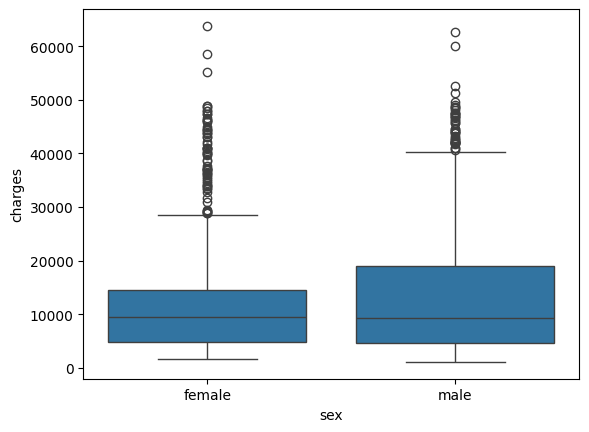

In [6]:
categorical_to_quantitative_col_stats(dataset_frame, 'sex', 'charges')

**Count:** There are 662 females and 676 males in the dataset.

**Mean:** The mean (average) medical charges for females is approximately 12,569.60, and for males, it is approximately 13,956.80. This suggests that, on average, males have slightly higher medical charges compared to females.

**Standard Deviation (Std):** For females, the standard deviation is approximately 11,128.70, and for males, it is approximately 12,971.00.

**Minimum (Min):** The minimum medical charge observed for females is 1,607.51, and for males, it is 1,121.87. This represents the lowest medical charge recorded in each group.

**25th Percentile (25%):** For females, the 25th percentile charge is approximately 4,885.16, and for males, it is approximately 4,619.13.

**50th Percentile (50%):** For females, the median charge is approximately 9,412.96, and for males, it is approximately 9,369.62.

**75th Percentile (75%):** For females, the 75th percentile charge is approximately 14,454.70, and for males, it is approximately 18,989.60.

**Maximum (Max):** For females is 63,770.40, and for males, it is 62,592.90. This represents the highest medical charge recorded in each group.

**Outlier:** For female we have possible outliers above 30,000 charges, However for Male on other hand it is above aprox. 42000 charges.


 - Descriptive stats for categorical variable Sex and Quantitative response variable Age 

┍━━━━━━━┯━━━━━━━━━━┯━━━━━━━━━━┑
│       │   female │     male │
┝━━━━━━━┿━━━━━━━━━━┿━━━━━━━━━━┥
│ count │ 662      │ 676      │
│ mean  │  39.503  │  38.9172 │
│ std   │  14.0542 │  14.0501 │
│ min   │  18      │  18      │
│ 25%   │  27      │  26      │
│ 50%   │  40      │  39      │
│ 75%   │  51.75   │  51      │
│ max   │  64      │  64      │
┕━━━━━━━┷━━━━━━━━━━┷━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Sex and Quantitative response variable Age


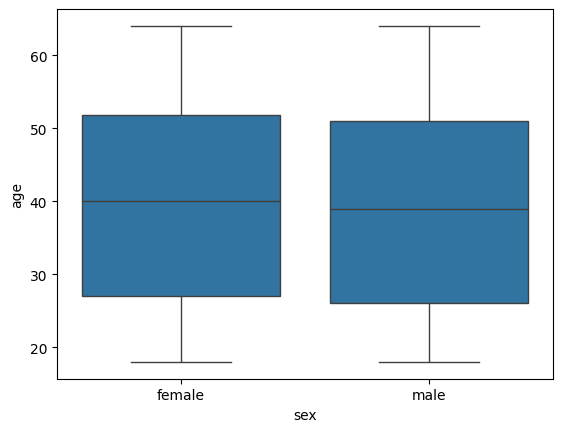

In [7]:
categorical_to_quantitative_col_stats(dataset_frame, 'sex', 'age')


- Count: There are 662 instances for females and 676 instances for males in the dataset.

- Mean: The average age for females is about 39.5 years, and for males, it's approximately 38.9 years.

- Standard Deviation (std): This indicates the spread of age values around the mean. It's around 14.05 years for both females and males.

- Minimum (min): The youngest age observed is 18 years for both females and males.

- 25th Percentile (25%): 25% of females are around 27 years old, and 25% of males are about 26 years old.

- 50th Percentile (50%) or Median: The middle age for females is around 40 years, and for males, it's approximately 39 years.

- 75th Percentile (75%): 75% of females are about 51.75 years old, and for males, it's around 51 years.

- Maximum (max): The oldest age observed is 64 years for both females and males.

- Outliers: There are no outliers in the age data for either females or males.


 - Descriptive stats for categorical variable Sex and Quantitative response variable Bmi 

┍━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┑
│       │    female │      male │
┝━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┥
│ count │ 662       │ 676       │
│ mean  │  30.3777  │  30.9431  │
│ std   │   6.04602 │   6.14043 │
│ min   │  16.815   │  15.96    │
│ 25%   │  26.125   │  26.41    │
│ 50%   │  30.1075  │  30.6875  │
│ 75%   │  34.3137  │  34.9925  │
│ max   │  48.07    │  53.13    │
┕━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Sex and Quantitative response variable Bmi


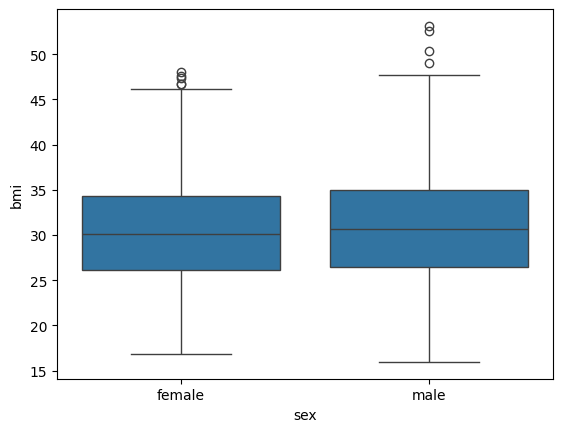

In [8]:
categorical_to_quantitative_col_stats(dataset_frame, 'sex', 'bmi')



- Count: There are 662 observations for females and 676 observations for males.

- Mean: The average BMI for females is around 30.38, while for males it's approximately 30.94.

- Standard Deviation (std): The variability or dispersion of BMI values around the mean is about 6.05 for females and 6.14 for males.

- Minimum (min): The lowest BMI observed is roughly 16.82 for females and 15.96 for males.

- 25th Percentile (25%): 25% of females have a BMI around 26.13, and 25% of males have a BMI around 26.41.

- 50th Percentile (50%) or Median: The middle value of BMI in the dataset is about 30.11 for females and 30.69 for males.

- 75th Percentile (75%): 75% of females have a BMI below approximately 34.31, and 75% of males have a BMI below around 34.99.

- Maximum (max): The highest BMI observed is roughly 48.07 for females and 53.13 for males.

- Outliers: Outliers are observed at the upper end of the BMI range in the boxplot. Some data points fall within the whiskers of the boxplot, while others fall outside, indicating potential extreme values.


 - Descriptive stats for categorical variable Sex and Quantitative response variable Children 

┍━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━━┑
│       │    female │      male │
┝━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━━┥
│ count │ 662       │ 676       │
│ mean  │   1.07402 │   1.11538 │
│ std   │   1.19212 │   1.21899 │
│ min   │   0       │   0       │
│ 25%   │   0       │   0       │
│ 50%   │   1       │   1       │
│ 75%   │   2       │   2       │
│ max   │   5       │   5       │
┕━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Sex and Quantitative response variable Children


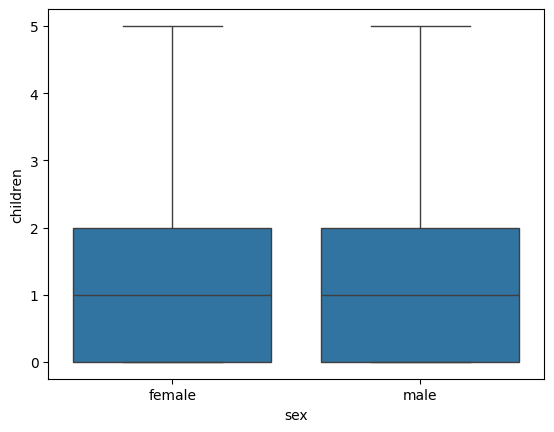

In [9]:
categorical_to_quantitative_col_stats(dataset_frame, 'sex', 'children')



Count: There are 662 instances for females and 676 instances for males in the dataset.

Mean: On average, females have around 1.07 children, while males have around 1.12 children.

Standard Deviation (std): This metric shows how spread out the number of children is from the average. For females, it's about 1.19, and for males, it's about 1.22.

Minimum (min): The smallest number of children observed is 0, which applies to both females and males.

25th Percentile (25%): 25% of the data falls below this value. It's 0 for both females and males.

50th Percentile (50%) or Median: This is the middle value of the dataset. It's 1 for both females and males.

75th Percentile (75%): 75% of the data falls below this value. It's 2 for females and also 2 for males.

Maximum (max): The largest number of children observed is 5, which applies to both females and males.

Outliers: The boxplot does not show any outliers, indicating that all data points are within a reasonable range and there are no extreme values.

<h2>(2.2) - Examining the relationship between categorical variable <b>Region</b> and quantitative response variables <b>['Charges', 'Bmi', 'Children']</b> from dataset.</h2>


 - Descriptive stats for categorical variable Region and Quantitative response variable Charges 

┍━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│       │   northeast │   northwest │   southeast │   southwest │
┝━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ count │      324    │      325    │      364    │      325    │
│ mean  │    13406.4  │    12417.6  │    14735.4  │    12346.9  │
│ std   │    11255.8  │    11072.3  │    13971.1  │    11557.2  │
│ min   │     1694.8  │     1621.34 │     1121.87 │     1241.57 │
│ 25%   │     5194.32 │     4719.74 │     4440.89 │     4751.07 │
│ 50%   │    10057.7  │     8965.8  │     9294.13 │     8798.59 │
│ 75%   │    16687.4  │    14711.7  │    19526.3  │    13462.5  │
│ max   │    58571.1  │    60021.4  │    63770.4  │    52590.8  │
┕━━━━━━━┷━━━━━━━━━━━━━┷━━━━━━━━━━━━━┷━━━━━━━━━━━━━┷━━━━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Region and Quantitative response variable Charges


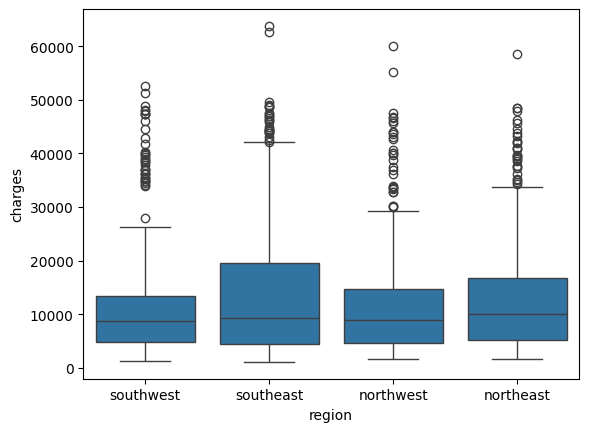

In [10]:
categorical_to_quantitative_col_stats(dataset_frame, 'region', 'charges')



The count reflects the quantity of data points observed within each region category. Specifically, there are 324 data points for the northeast, 325 for the northwest, 364 for the southeast, and 325 for the southwest region.

Regarding the mean, it signifies the average insurance charges within each region. The mean charges are approximately  13,406 for the northeast, 12,418 for the northwest, 14,735 for the southeast, and 12,347 for the southwest regions.

The standard deviation (std) measures how spread out the insurance charges are around their respective means. For the northeast, northwest, southeast, and southwest regions, the standard deviations are approximately 11,256, 11,072, 13,971, and 11,557, respectively.

The minimum (min) value denotes the lowest observed insurance charge within each region, approximately 1,695 for the northeast, 1,621 for the northwest, 1,122 for the southeast, and 1,242 for the southwest regions.

The 25th percentile (25%) represents the charge value below which 25% of the data falls. This percentile charge is approximately 5,194 for the northeast, 4,719 for the northwest, 4,441 for the southeast, and 4,751 for the southwest regions.

The 50th percentile (50%) or median denotes the middle value of the dataset. For the northeast, northwest, southeast, and southwest regions, the median charges are approximately 10,058, 8,966, 9,294, and 8,799, respectively.

The 75th percentile (75%) represents the charge value below which 75% of the data falls. This percentile charge is approximately 16,687 for the northeast, 14,712 for the northwest, 19,526 for the southeast, and 13,463 for the southwest regions.

The maximum (max) value indicates the highest observed insurance charge within each region. Specifically, the maximum charges are approximately 58,571 for the northeast, 60,021 for the northwest, 63,770 for the southeast, and 52,590 for the southwest regions.

Regarding outliers, any charge value beyond the upper bound or lower than the lower bound is considered an outlier. In this dataset, there are outliers observed in all four regions, as indicated by the maximum charges exceeding their respective upper bounds.


 - Descriptive stats for categorical variable Region and Quantitative response variable Bmi 

┍━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│       │   northeast │   northwest │   southeast │   southwest │
┝━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ count │   324       │   325       │   364       │   325       │
│ mean  │    29.1735  │    29.1998  │    33.356   │    30.5966  │
│ std   │     5.93751 │     5.13676 │     6.47765 │     5.69184 │
│ min   │    15.96    │    17.385   │    19.8     │    17.4     │
│ 25%   │    24.8663  │    25.745   │    28.5725  │    26.9     │
│ 50%   │    28.88    │    28.88    │    33.33    │    30.3     │
│ 75%   │    32.8937  │    32.775   │    37.8125  │    34.6     │
│ max   │    48.07    │    42.94    │    53.13    │    47.6     │
┕━━━━━━━┷━━━━━━━━━━━━━┷━━━━━━━━━━━━━┷━━━━━━━━━━━━━┷━━━━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Region and Quantitative response variable Bmi


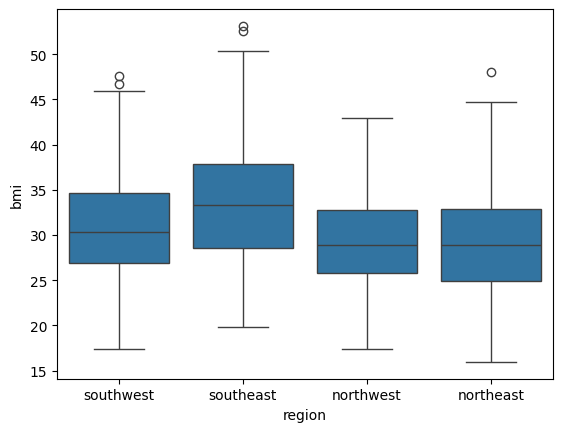

In [12]:
categorical_to_quantitative_col_stats(dataset_frame, 'region', 'bmi')


- Count: The dataset comprises 324 observations for the northeast, 325 for the northwest, 364 for the southeast, and 325 for the southwest region.
  
- Mean: The mean represents the average BMI for each region. The mean BMI for the northeast, northwest, southeast, and southwest regions are approximately 29.17, 29.20, 33.36, and 30.60, respectively.

- Standard Deviation (std): This measures the spread of BMI values around the mean. The standard deviations for the northeast, northwest, southeast, and southwest regions are approximately 5.94, 5.14, 6.48, and 5.69, respectively.

- Minimum (min): This indicates the lowest observed BMI in each region, which is 15.96 for all regions.

- 25th Percentile (25%): This is the BMI value below which 25% of the data falls. For all regions, the 25th percentile BMI is around 24.87.

- 50th Percentile (50%) or Median: This is the middle BMI value of the dataset. For all regions, the median BMI is approximately 28.88.

- 75th Percentile (75%): This is the BMI value below which 75% of the data falls. For all regions, the 75th percentile BMI is around 32.89.

- Maximum (max): The maximum BMI represents the highest observed value in each region. The maximum BMI values for the northeast, northwest, southeast, and southwest regions are 48.07, 42.94, 53.13, and 47.60, respectively.

- Outliers: An outlier is a BMI value beyond the upper bound. Only the northwest region does not have outliers, while the other regions do. The maximum BMI for each region exceeds its upper bound, indicating outliers.


 - Descriptive stats for categorical variable Region and Quantitative response variable Children 

┍━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━┯━━━━━━━━━━━━━┑
│       │   northeast │   northwest │   southeast │   southwest │
┝━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━┿━━━━━━━━━━━━━┥
│ count │   324       │   325       │   364       │   325       │
│ mean  │     1.0463  │     1.14769 │     1.04945 │     1.14154 │
│ std   │     1.19895 │     1.17183 │     1.17728 │     1.27595 │
│ min   │     0       │     0       │     0       │     0       │
│ 25%   │     0       │     0       │     0       │     0       │
│ 50%   │     1       │     1       │     1       │     1       │
│ 75%   │     2       │     2       │     2       │     2       │
│ max   │     5       │     5       │     5       │     5       │
┕━━━━━━━┷━━━━━━━━━━━━━┷━━━━━━━━━━━━━┷━━━━━━━━━━━━━┷━━━━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Region and Quantitative response variable Children

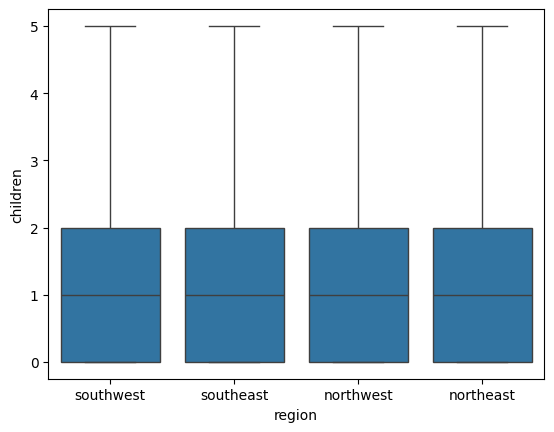

In [240]:
categorical_to_quantitative_col_stats(dataset_frame, 'region', 'children')


- Count: The dataset includes 324 observations for the northeast, 325 for the northwest, 364 for the southeast, and 325 for the southwest region.
  
- Mean: The mean represents the average number of children for each region. The mean number of children for the northeast, northwest, southeast, and southwest regions are approximately 1.05, 1.15, 1.05, and 1.14, respectively.

- Standard Deviation (std): This measures the spread of the number of children around the mean. The standard deviations for the northeast, northwest, southeast, and southwest regions are approximately 1.20, 1.17, 1.18, and 1.28, respectively.

- Minimum (min): This indicates the lowest number of children observed in each region, which is 0 for all regions.

- 25th Percentile (25%): This is the number of children below which 25% of the data falls. For all regions, the 25th percentile number of children is 0.

- 50th Percentile (50%) or Median: This is the middle number of children in the dataset. For all regions, the median number of children is 1.

- 75th Percentile (75%): This is the number of children below which 75% of the data falls. For all regions, the 75th percentile number of children is 2.

- Maximum (max): The maximum number of children represents the highest observed value in each region. The maximum number of children for all regions is 5.

- Outliers: Any number of children beyond the upper bound is considered an outlier. However, in this case, the maximum number of children is equal to the upper bound for all regions, indicating no outliers.

<h2>(2.3) - Examining the relationship between categorical variable <b>Smoker</b> and quantitative response variables <b>['Charges', 'Age', 'Bmi', 'Children']</b> from dataset.</h2>


 - Descriptive stats for categorical variable Smoker and Quantitative response variable Charges 

┍━━━━━━━┯━━━━━━━━━━┯━━━━━━━━━┑
│       │       no │     yes │
┝━━━━━━━┿━━━━━━━━━━┿━━━━━━━━━┥
│ count │  1064    │   274   │
│ mean  │  8434.27 │ 32050.2 │
│ std   │  5993.78 │ 11541.5 │
│ min   │  1121.87 │ 12829.5 │
│ 25%   │  3986.44 │ 20826.2 │
│ 50%   │  7345.41 │ 34456.3 │
│ 75%   │ 11362.9  │ 41019.2 │
│ max   │ 36910.6  │ 63770.4 │
┕━━━━━━━┷━━━━━━━━━━┷━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Smoker and Quantitative response variable Charges


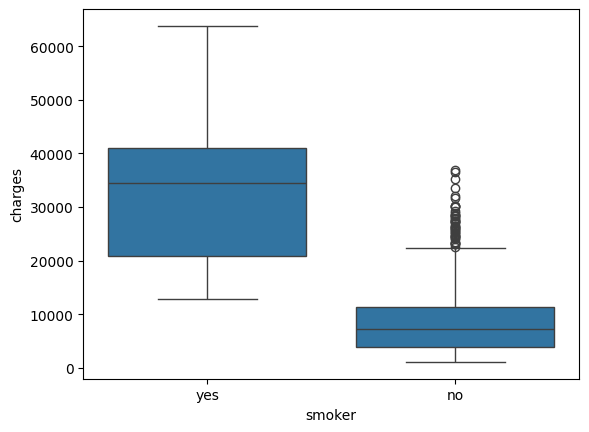

In [249]:
categorical_to_quantitative_col_stats(dataset_frame, 'smoker', 'charges')


- Count: There are 1064 observations for non-smokers and 274 observations for smokers in the dataset.
  
- Mean: The average insurance charges for non-smokers is around 8,434 dollars, significantly lower than the average for smokers, which is approximately 32,050 dollars.

- Standard Deviation (std): This measures the spread of insurance charges around the mean. For non-smokers, it's about 5,994 dollars, and for smokers, it's approximately 11,542 dollars, showing a wider range among smokers.

- Minimum (min): The lowest insurance charge observed for non-smokers is about 1,122 dollars, while for smokers, it's around 12,829 dollars.

- 25th Percentile (25%): This value indicates where 25% of the data falls below. For non-smokers, it's roughly 3,986 dollars, and for smokers, it's about 20,826 dollars.

- 50th Percentile (50%) or Median: This represents the middle value of the dataset. For non-smokers, it's around 7,345 dollars, and for smokers, it's approximately 34,456 dollars.

- 75th Percentile (75%): This is the value below which 75% of the data falls. For non-smokers, it's approximately 11,363 dollars, and for smokers, it's roughly 41,019 dollars.

- Maximum (max): The highest insurance charge observed for non-smokers is approximately 36,911 dollars, while for smokers, it's about 63,770 dollars.

- Outliers: Both non-smokers and smokers have outliers based on the upper bounds calculated from the interquartile range (IQR). The upper bound for non-smokers is around 21,970.5 dollars, and for smokers, it's approximately 71,610.5 dollars.


 - Descriptive stats for categorical variable Smoker and Quantitative response variable Age 

┍━━━━━━━┯━━━━━━━━━━━┯━━━━━━━━━━┑
│       │        no │      yes │
┝━━━━━━━┿━━━━━━━━━━━┿━━━━━━━━━━┥
│ count │ 1064      │ 274      │
│ mean  │   39.3853 │  38.5146 │
│ std   │   14.0834 │  13.9232 │
│ min   │   18      │  18      │
│ 25%   │   26.75   │  27      │
│ 50%   │   40      │  38      │
│ 75%   │   52      │  49      │
│ max   │   64      │  64      │
┕━━━━━━━┷━━━━━━━━━━━┷━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Smoker and Quantitative response variable Age


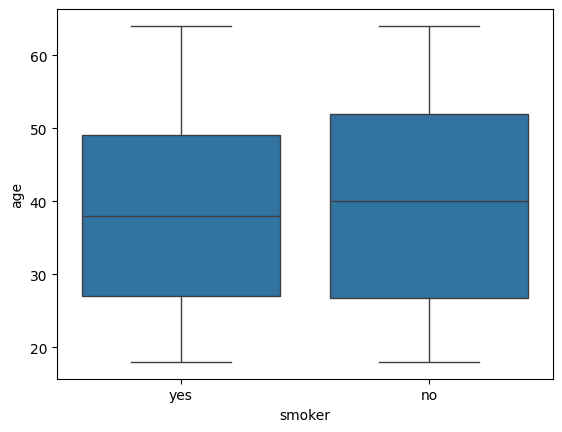

In [15]:
categorical_to_quantitative_col_stats(dataset_frame, 'smoker', 'age')


- Count: The dataset includes 1064 observations for non-smokers and 274 observations for smokers.
  
- Mean: The average age for non-smokers is approximately 39.39 years, slightly higher than for smokers, which is approximately 38.51 years.

- Standard Deviation (std): The spread of ages around the mean is approximately 14.08 years for non-smokers and 13.92 years for smokers, indicating a similar variability in age among both groups.

- Minimum (min): The youngest individual in both groups is 18 years old, reflecting the minimum age in the dataset.

- 25th Percentile (25%): About 25% of non-smokers are 26.75 years old or younger, while 25% of smokers are 27 years old or younger, showing a comparable distribution of younger individuals in both groups.

- 50th Percentile (50%) or Median: The middle age in both groups, represented by the median, is 40 years, indicating a balanced age distribution around the middle for both non-smokers and smokers.

- 75th Percentile (75%): Around 75% of non-smokers are 52 years old or younger, while 75% of smokers are 49 years old or younger, showing a slightly younger distribution for smokers compared to non-smokers.

- Maximum (max): The oldest individual in both groups is 64 years old, reflecting the maximum age in the dataset.

- Outliers: There are no outliers observed in either group based on the calculated upper and lower bounds. For non-smokers, ages beyond 79.13 years would be considered outliers, and for smokers, ages beyond 81 years would be considered outliers.


 - Descriptive stats for categorical variable Smoker and Quantitative response variable Bmi 

┍━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┑
│       │         no │       yes │
┝━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┥
│ count │ 1064       │ 274       │
│ mean  │   30.6518  │  30.7084  │
│ std   │    6.04311 │   6.31864 │
│ min   │   15.96    │  17.195   │
│ 25%   │   26.315   │  26.0838  │
│ 50%   │   30.3525  │  30.4475  │
│ 75%   │   34.43    │  35.2     │
│ max   │   53.13    │  52.58    │
┕━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Smoker and Quantitative response variable Bmi


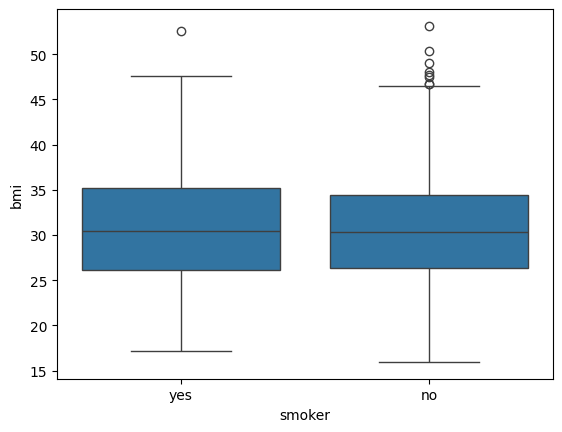

In [16]:
categorical_to_quantitative_col_stats(dataset_frame, 'smoker', 'bmi')

- Count: The dataset includes 1064 observations for non-smokers and 274 observations for smokers.
  
- Mean: The average BMI for non-smokers is approximately 30.65, and for smokers, it is around 30.71, indicating a similar average BMI between the two groups.

- Standard Deviation (std): The spread of BMI values around the mean is approximately 6.04 for non-smokers and 6.32 for smokers, suggesting slightly higher variability in BMI among smokers.

- Minimum (min): The minimum BMI observed is 15.96 for non-smokers and 17.20 for smokers, showing that both groups have individuals with relatively low BMI values.

- 25th Percentile (25%): About 25% of non-smokers have a BMI below approximately 26.32, while 25% of smokers have a BMI below around 26.08, indicating a similar distribution of lower BMI values in both groups.

- 50th Percentile (50%) or Median: The middle BMI value, represented by the median, is approximately 30.35 for both non-smokers and smokers, suggesting a balanced distribution around the middle BMI for both groups.

- 75th Percentile (75%): Around 75% of non-smokers have a BMI below about 34.43, and 75% of smokers have a BMI below around 35.20, showing a slightly higher upper quartile BMI for smokers compared to non-smokers.

- Maximum (max): The maximum BMI observed is 53.13 for non-smokers and 52.58 for smokers, indicating that both groups have individuals with relatively high BMI values.

- Outliers Calculation: Both non-smokers and smokers have observable outliers based on the calculated upper and lower bounds. For non-smokers, BMI values beyond 47.90 would be considered outliers, while for smokers, BMI values beyond 49.84 would be considered outliers.


 - Descriptive stats for categorical variable Smoker and Quantitative response variable Children 

┍━━━━━━━┯━━━━━━━━━━━━┯━━━━━━━━━━━┑
│       │         no │       yes │
┝━━━━━━━┿━━━━━━━━━━━━┿━━━━━━━━━━━┥
│ count │ 1064       │ 274       │
│ mean  │    1.09023 │   1.11314 │
│ std   │    1.21814 │   1.15707 │
│ min   │    0       │   0       │
│ 25%   │    0       │   0       │
│ 50%   │    1       │   1       │
│ 75%   │    2       │   2       │
│ max   │    5       │   5       │
┕━━━━━━━┷━━━━━━━━━━━━┷━━━━━━━━━━━┙

 - Ploting side-by-side boxplot for categorical variable Smoker and Quantitative response variable Children


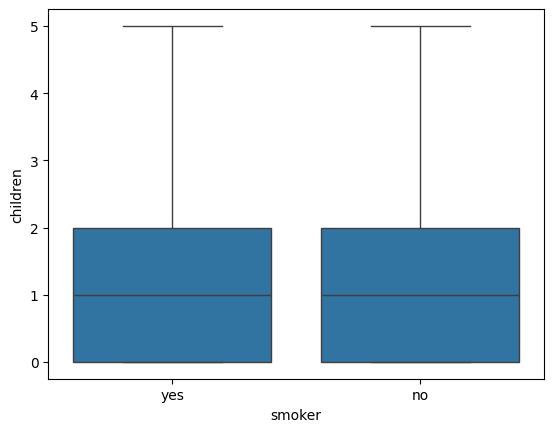

In [17]:
categorical_to_quantitative_col_stats(dataset_frame, 'smoker', 'children')

- Count: There are 1064 observations for non-smokers and 274 observations for smokers, indicating a larger sample size for non-smokers.

- Mean: On average, non-smokers have approximately 1.09 children, while smokers have around 1.11 children. The difference in means is quite small.

- Standard Deviation (std): The standard deviation for the number of children is approximately 1.22 for non-smokers and 1.16 for smokers, indicating slightly less variability in the number of children among smokers compared to non-smokers.

- Minimum (min): The minimum number of children observed is 0 for both non-smokers and smokers, indicating that some individuals in both groups do not have children.

- 25th Percentile (25%): 25% of both non-smokers and smokers have 0 children, suggesting a significant portion of individuals in both groups do not have children.

- 50th Percentile (50%) or Median: The median number of children for both non-smokers and smokers is 1, indicating that half of the individuals in each group have 1 child.

- 75th Percentile (75%): 75% of both non-smokers and smokers have 2 or fewer children, indicating that most individuals in both groups have a relatively low number of children.

- Maximum (max): The maximum number of children observed is 5 for both non-smokers and smokers, indicating that there are individuals in both groups with a larger number of children.

- Outliers: There are no outliers in either smokers or non-smokers based on the calculated upper and lower bounds of the interquartile range (IQR). Both groups have a similar distribution of the number of children without extreme values.

# 3. Examine the relationship between categorical variables from the dataset, a pair (C->C) at a time

__________________________

In [198]:
def categorical_to_categorical_relationship(df: pd.DataFrame, col1: str, col2: str, labels: list, xlabel: str, ylabel: str, title: str ):
    plot_df = pd.DataFrame()
    
    # Creating 2 way table 
    two_way_table = pd.crosstab(df[col1], df[col2])
    percentage_cols = []
    print(f'1. Two way table (contingency table) for \033[1m{col1}\033[0m and \033[1m{col2}\033[0m \n')
    display(two_way_table)
    
    # Calculating conditional percentages (%)
    print(f'\n2. Conditional Percentage \n')
    for col in two_way_table:
        total = two_way_table[col].sum()
        for index in two_way_table.index:
            two_way_table.loc[index, f'{col}_percentage'] = round((two_way_table.loc[index, col] / total) * 100, 2)
            percentage_cols.append(f'{col}_percentage')
    display(two_way_table)
    
    # Ploting Grouped bar chart with labels
    print(f'\n3. Ploting double-bar charts from conditional percentages for \033[1m{title}\033[0m \n')
    for cols in list(set(percentage_cols)):
        plot_df = pd.concat([plot_df, two_way_table[cols]], axis = 1)

    label_loc = np.arange(len(labels))
    width = 0.3
    multiplier = 0

    fig, ax = plt.subplots(layout = 'constrained', figsize = (10,7))
    for attribute, measurement in plot_df.items():
        offset = width * multiplier
        rects = ax.bar(label_loc + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(label_loc + width, labels)
    ax.legend()
    plt.show()

### (3.1) Examining the relationship between categorical variables from the dataset (Region and Sex)

1. Two way table (contingency table) for region and sex 



sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163



2. Conditional Percentage 



sex,female,male,female_percentage,male_percentage
region,,,,
northeast,161,163,24.32,24.11
northwest,164,161,24.77,23.82
southeast,175,189,26.44,27.96
southwest,162,163,24.47,24.11



3. Ploting double-bar charts from conditional percentages for Percentage of Gender with Regions 



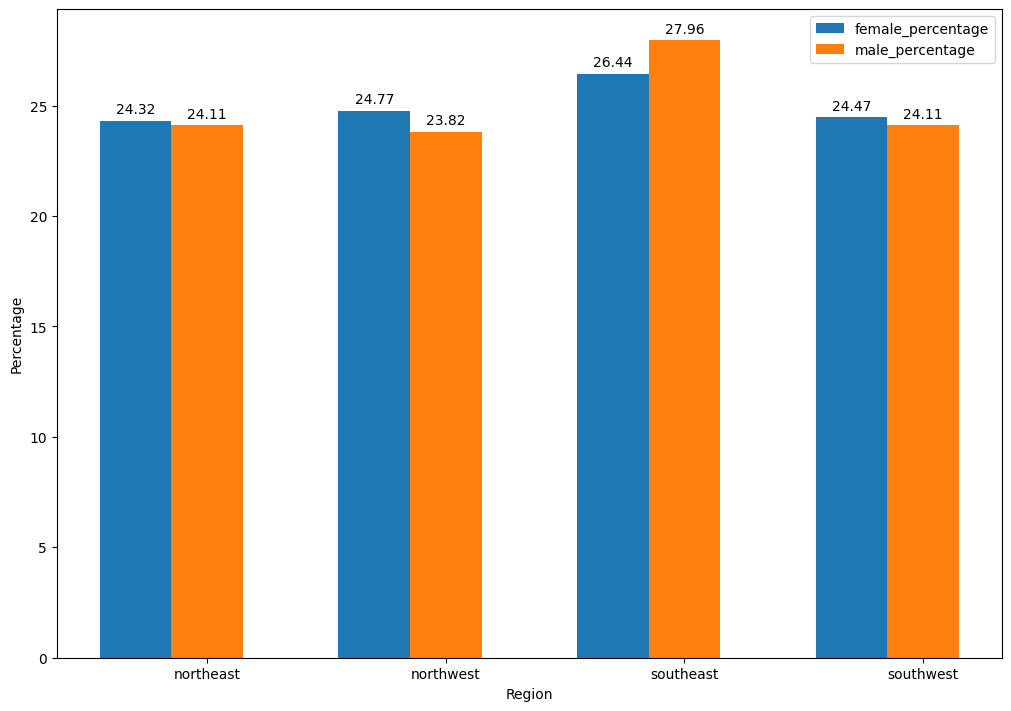

In [193]:
categorical_to_categorical_relationship(df = dataset_frame,
                                        col1 = 'region',
                                        col2 = 'sex', 
                                        labels = ['northeast', 'northwest', 'southeast', 'southwest'],
                                        xlabel = 'Region',
                                        ylabel = 'Percentage',
                                        title = 'Percentage of Gender with Regions'
                                       )

Examining the conditional percentages provides a clearer view of the region distribution within Gender. Among females, approximately 24.32% are from the northeast region, 24.77% from the northwest region, 26.44% from the southeast region, and 24.47% from the southwest region. Among males, approximately 24.11% are from the northeast region, 23.82% from the northwest region, 27.96% from the southeast region, and 24.11% from the southwest region.



### (3.2) Examining the relationship between categorical variables from the dataset (Region and Smoker)

1. Two way table (contingency table) for region and smoker 



smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58



2. Conditional Percentage 



smoker,no,yes,no_percentage,yes_percentage
region,,,,
northeast,257,67,24.15,24.45
northwest,267,58,25.09,21.17
southeast,273,91,25.66,33.21
southwest,267,58,25.09,21.17



3. Ploting double-bar charts from conditional percentages for Percentage of Smoker and Non Smoker with Regions 



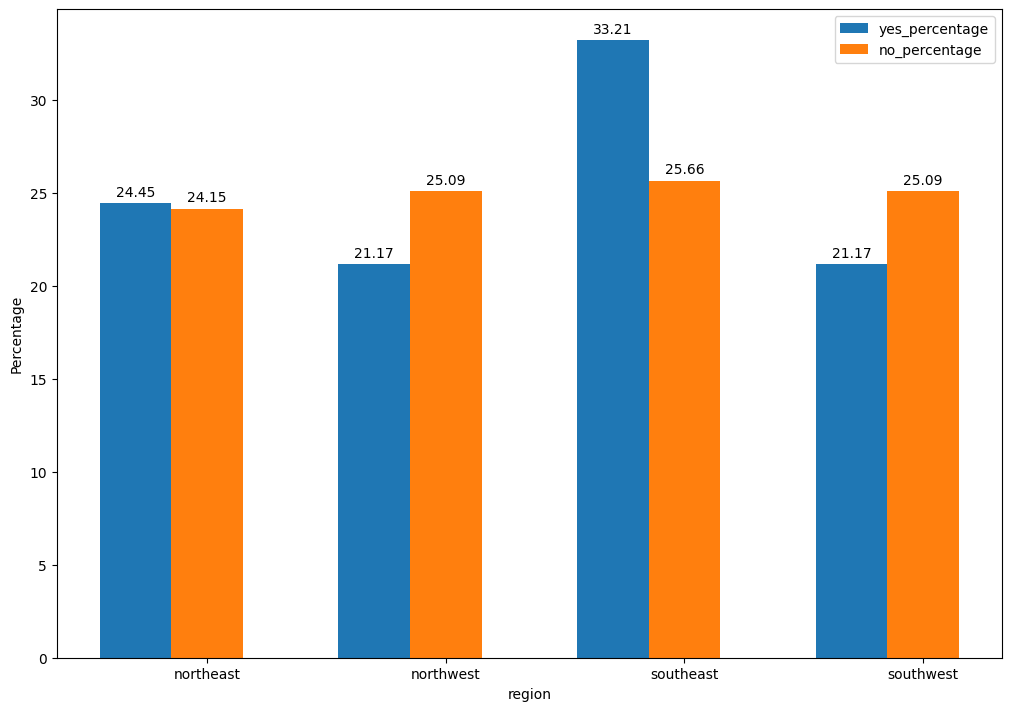

In [194]:
categorical_to_categorical_relationship(df = dataset_frame,
                                        col1 = 'region',
                                        col2 = 'smoker', 
                                        labels = ['northeast', 'northwest', 'southeast', 'southwest'],
                                        xlabel = 'region',
                                        ylabel = 'Percentage',
                                        title = 'Percentage of Smoker and Non Smoker with Regions'
                                       )

The conditional percentages offer valuable insights into the ratio of smokers and non-smokers within each region. These percentages are key in understanding how smoking habits vary across different regions:

Among non-smokers:
24.15% are from the northeast region.
25.09% are from the northwest region.
25.66% are from the southeast region.
25.09% are from the southwest region.
Among smokers:
24.45% are from the northeast region.
21.17% are from the northwest region.
33.21% are from the southeast region.
21.17% are from the southwest region.

### (3.3) Examining the relationship between categorical variables from the dataset (Smoker and Sex)

1. Two way table (contingency table) for smoker and sex 



sex,female,male
smoker,,
no,547,517
yes,115,159



2. Conditional Percentage 



sex,female,male,female_percentage,male_percentage
smoker,,,,
no,547,517,82.63,76.48
yes,115,159,17.37,23.52



3. Ploting double-bar charts from conditional percentages for Percentage of Gender with Smoker 



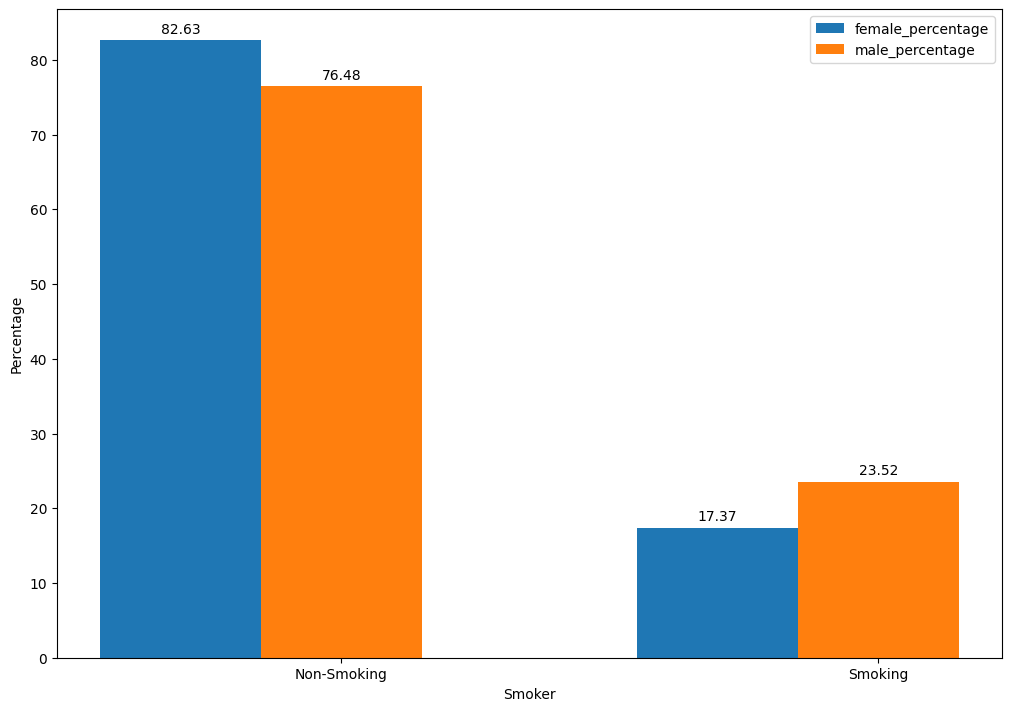

In [243]:
categorical_to_categorical_relationship(df = dataset_frame,
                                        col1 = 'smoker',
                                        col2 = 'sex', 
                                        labels = ['Non-Smoking', 'Smoking'],
                                        xlabel = 'Smoker',
                                        ylabel = 'Percentage',
                                        title = 'Percentage of Gender with Smoker'
                                       )

Analyzing conditional percentages provides a clearer insight into the proportion of smokers and non-smokers within each gender group. Notably, a higher percentage of males smoke compared to females, a trend evident in the bar plot representation.

The double bar plot illustrates that 17.37% of females are smokers, while 82.63% are non-smokers. Similarly, 23.52% of males are smokers, while 76.48% are non-smokers.

# 4. Examine the relationship between quantitative variables, a pair (Q->Q)

--------------

In [229]:
def quan_to_quan_relationship_scatter_plot(df: pd.DataFrame, col1: str, col2: str, xlabel: str, ylabel: str):
    # calculate linear correlation between two quantitative variables
    corr_mat = np.corrcoef(df[col1],df[col2])
    r = corr_mat[0][1]

    # scatter plot for two quantitative variables
    print(f'\n Ploting Scatter plot chart for quantitative variable \033[1m{xlabel}\033[0m and \033[1m{ylabel}\033[0m\n')
    plt.scatter(df[col1], df[col2])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'r = {round(r, 4)}')

def quan_to_quan_relationship_with_list_square_regression_line(df: pd.DataFrame, col1: str, col2: str, xlabel: str, ylabel: str, cond: str):
    df_small = df.query(cond)
    
    # correlation
    r = np.corrcoef(df_small[col1], df_small[col2])[0][1]
    
    # calculate slope
    b = r*(np.std(df_small[col2])/np.std(df_small[col1]))
    
    # calculate intercept
    a = np.mean(df_small[col2]) - b*np.mean(df_small[col1])
    
    # regression line
    x = np.linspace(10,100)
    y = a + b*x
    
    # plot scatter
    plt.scatter(df_small[col1], df_small[col2])
    
    # plot regression line
    plt.plot(x, y, '-r', label=f'{col2}={round(a,3)} + {round(b,3)}*{col1}')
    plt.xlabel(xlabel, color='#1C2833')
    plt.ylabel(ylabel, color='#1C2833')
    plt.legend(loc='upper left')
    plt.title('Least Square Regression')



### (4.1) Examining the relationship between Quantitative variables from the dataset (Age and Charges)


 Ploting Scatter plot chart for quantitative variable Age and Charges



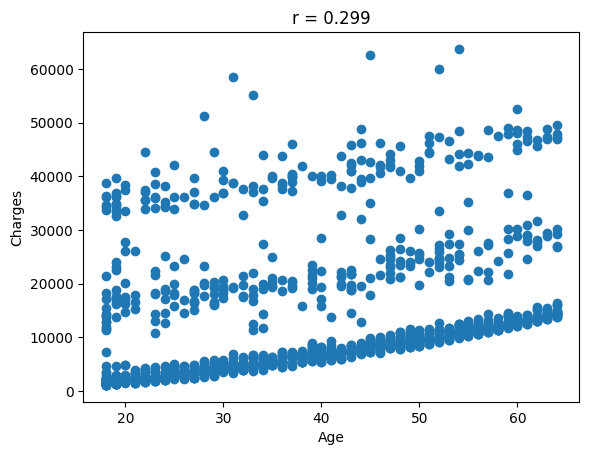

In [220]:
quan_to_quan_relationship_scatter_plot(
                          df = dataset_frame, 
                          col1 = 'age', 
                          col2 = 'charges', 
                          xlabel = 'Age', 
                          ylabel = 'Charges')

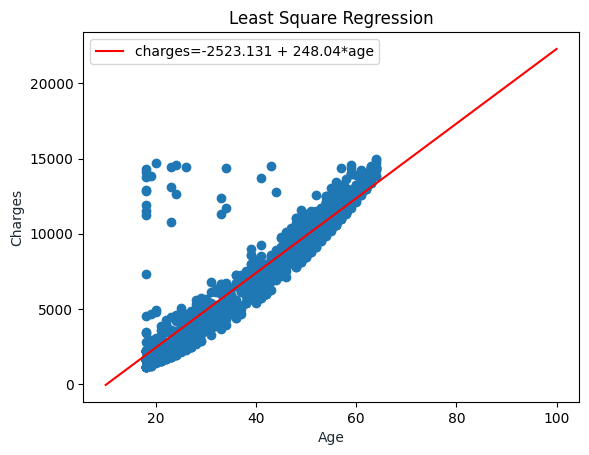

In [230]:
quan_to_quan_relationship_with_list_square_regression_line(
                          df = dataset_frame, 
                          col1 = 'age', 
                          col2 = 'charges', 
                          xlabel = 'Age', 
                          ylabel = 'Charges', 
                          cond = 'charges <= 15000')

- Scatter Plot: The scatter plot shows a person's age against their healthcare charges. Generally, as age increases, charges also tend to increase, with a few outliers.

- Linear Correlation: The correlation value of about 0.299 indicates a moderate positive relationship between age and charges. This means that as age rises, charges tend to rise as well, though not extremely strongly.

- Least Square Regression Line: This line is a best-fit representation of the data in the scatter plot, helping estimate charges based on age. However, it also predicts charges for age 0, which is not realistic. While it gives a rough idea of how charges change with age, it's not entirely accurate.


### (4.2) Examining the relationship between Quantitative variables from the dataset (Age and Children)


 Ploting Scatter plot chart for quantitative variable Age and Children



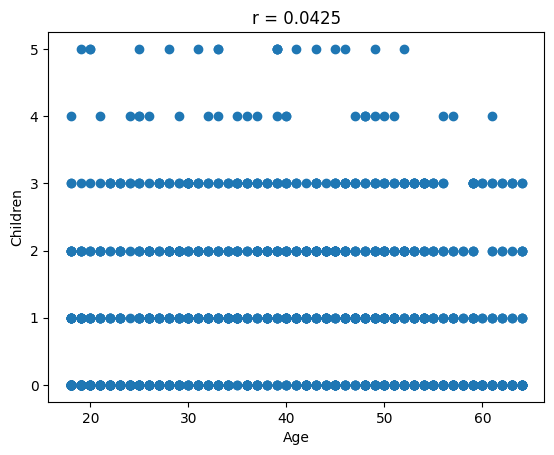

In [232]:
quan_to_quan_relationship_scatter_plot(
                          df = dataset_frame, 
                          col1 = 'age', 
                          col2 = 'children', 
                          xlabel = 'Age', 
                          ylabel = 'Children')

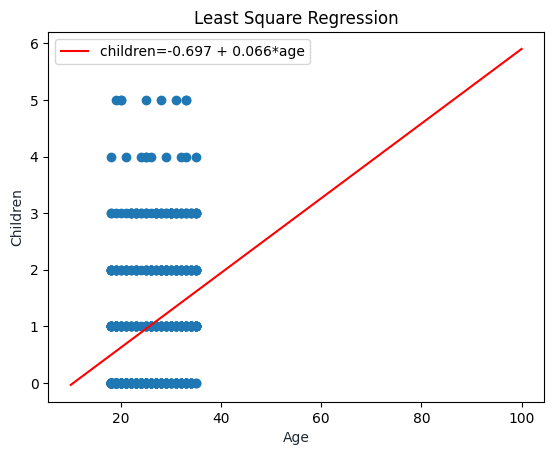

In [235]:
quan_to_quan_relationship_with_list_square_regression_line(
                          df = dataset_frame, 
                          col1 = 'age', 
                          col2 = 'children', 
                          xlabel = 'Age', 
                          ylabel = 'Children', 
                          cond = 'age <= 35')

- Scatter Plot: The scatter plot displays points scattered randomly without a clear pattern as age increases, suggesting a weak relationship between age and the number of children.
  
- Linear Correlation: The correlation coefficient of approximately 0.042 indicates a very weak positive relationship between age and the number of children, as it is close to zero.


### (4.3) Examining the relationship between Quantitative variables from the dataset (Age and Bmi)


 Ploting Scatter plot chart for quantitative variable Age and BMI



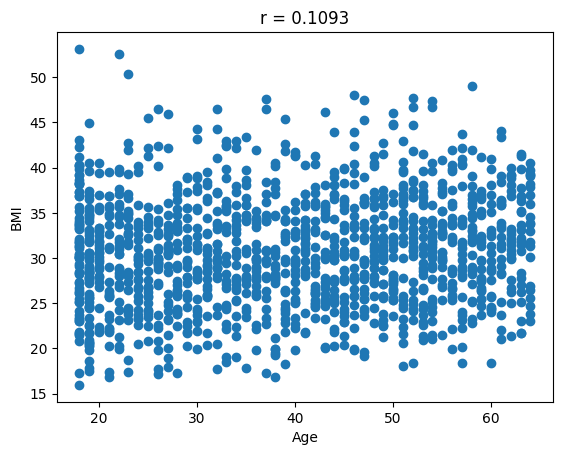

In [236]:
quan_to_quan_relationship_scatter_plot(
                          df = dataset_frame, 
                          col1 = 'age', 
                          col2 = 'bmi', 
                          xlabel = 'Age', 
                          ylabel = 'BMI')

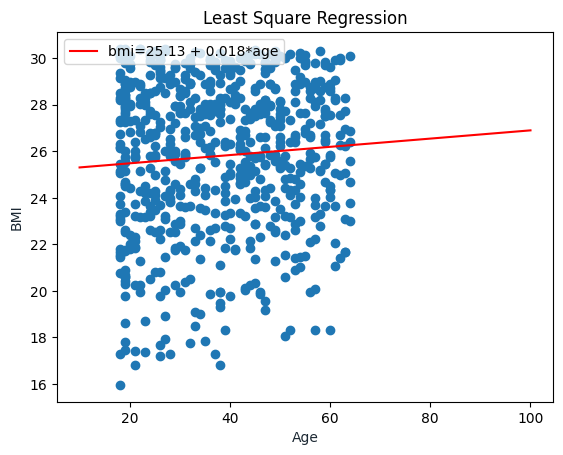

In [247]:
quan_to_quan_relationship_with_list_square_regression_line(
                          df = dataset_frame, 
                          col1 = 'age', 
                          col2 = 'bmi', 
                          xlabel = 'Age', 
                          ylabel = 'BMI', 
                          cond = 'bmi <= 30.4')

- Scatter Plot: The scatter plot shows scattered points without a clear trend as age increases, suggesting a weak relationship between age and BMI. It implies that age alone may not reliably predict BMI.

- Linear Correlation: The correlation coefficient of approximately 0.109 indicates a weak positive relationship between age and BMI, as it is relatively low but still positive.

- Least Square Regression Line: The regression equation indicates a weak relationship between age and BMI, with a small increase in BMI for each additional year of age. However, the slope is modest, suggesting that age has only a minor impact on BMI.